In [7]:
import os
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import gc_fraction
from glob import glob
import matplotlib.pyplot as plt

In [8]:
genomes= "/home/infosebi/Documents/Programmieren/MastersProject/genomes"
file_names=glob('%s/*.gbff'%genomes)
outputfile='/home/infosebi/Documents/Programmieren/MastersProject/clusters.fasta'

In [9]:
# sequence based bioprospecting, pathways, primary and secondary metabolites

#Prodigal vs. genemark s2+ -> location (translate to protein)
#rRna, trna (later)

# iframe panel, embedded webpages, communication -> postmessage, https://discourse.holoviz.org/t/local-host-refuses-to-connect-to-iframe/361

#genome statistics, sequence statistics exel file
#genome size
#look into gc skew
#why 7 housekeeoing genes
# cog -id, kegg -> eggnogg paper
#how do you get coding regions
#what is show contigs

In [10]:
proteins=[]
GC_contents = {}
for genbank_file in file_names:
    for gb_obj in SeqIO.parse(genbank_file,'genbank'):
        genome_name = os.path.basename(genbank_file).split('.gbff')[0]
        GC_contents[genome_name] = gc_fraction(gb_obj.seq)
        for feature in gb_obj.features:
             if feature.type == "CDS":
                protein = SeqRecord(Seq(feature.qualifiers['translation'][0]), id=feature.qualifiers['locus_tag'][0], description='')
                proteins.append(protein)

In [11]:
SeqIO.write(proteins,outputfile,'fasta')

37324

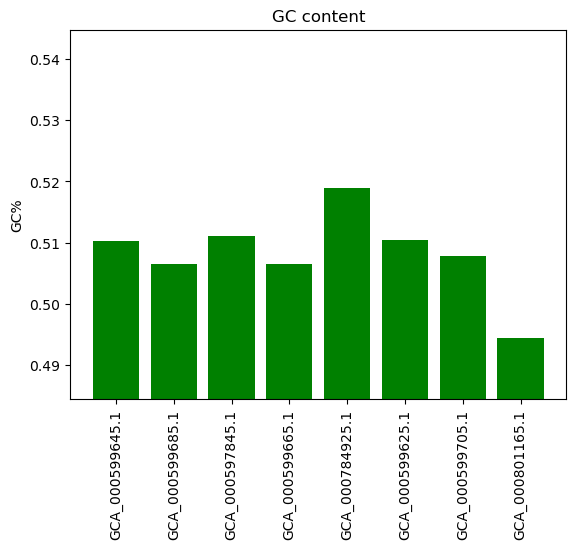

In [12]:
plt.bar(*zip(*GC_contents.items()), color = "green")
plt.title('GC content')
plt.xticks(rotation='vertical')
plt.ylabel('GC%')
plt.axis(ymin=min(GC_contents.values())-0.01)
plt.savefig(f'{genomes}/GC%.png')

In [13]:
!diamond makedb --in clusters.fasta -d clusterdb 
!diamond cluster --db clusterdb --evalue 0.00001 --approx-id 50.0 --member-cover 50.0 --out clusters.txt --cluster-steps faster sensitive ultra-sensitive   

zsh:1: command not found: diamond
zsh:1: command not found: diamond


Building reference seed array...  [0.056s]
Building query seed array...  [0.056s]
Computing hash join...  [0.019s]
Masking low complexity seeds...  [0.018s]
Searching alignments...  [0.021s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 12/16, index chunk 2/4.
Building reference seed array...  [0.051s]
Building query seed array...  [0.059s]
Computing hash join...  [0.025s]
Masking low complexity seeds...  [0.024s]
Searching alignments...  [0.033s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 12/16, index chunk 3/4.
Building reference seed array...  [0.089s]
Building query seed array...  [0.071s]
Computing hash join...  [0.019s]
Masking low complexity seeds...  [0.019s]
Searching alignments...  [0.024s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 12/16, index chunk 4/4.
Building reference seed array...  [0.059s]
Building query seed array...  [0.052s]
Computing hash join...  [0.

Masking low complexity seeds...  [0.042s]
Searching alignments...  [0.073s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 34/64.
Building reference seed array...  [0.053s]
Building query seed array...  [0.058s]
Computing hash join...  [0.056s]
Masking low complexity seeds...  [0.041s]
Searching alignments...  [0.071s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 35/64.
Building reference seed array...  [0.055s]
Building query seed array...  [0.051s]
Computing hash join...  [0.058s]
Masking low complexity seeds...  [0.038s]
Searching alignments...  [0.068s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 36/64.
Building reference seed array...  [0.058s]
Building query seed array...  [0.056s]
Computing hash join...  [0.062s]
Masking low complexity seeds...  [0.049s]
Searching alignments...  [0.088s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 37

Building reference seed array...  [0.051s]
Building query seed array...  [0.059s]
Computing hash join...  [0.052s]
Masking low complexity seeds...  [0.045s]
Searching alignments...  [0.079s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 64/64.
Building reference seed array...  [0.053s]
Building query seed array...  [0.052s]
Computing hash join...  [0.071s]
Masking low complexity seeds...  [0.056s]
Searching alignments...  [0.085s]
Deallocating memory...  [0s]
Deallocating buffers...  [0s]
Clearing query masking...  [0.001s]
Computing alignments... Loading trace points...  [0.049s]
Sorting trace points...  [0.005s]
Computing alignments...  [2.196s]
Deallocating buffers...  [0.001s]
Loading trace points...  [0s]
 [2.258s]
Deallocating reference...  [0s]
Loading reference sequences...  [0s]
Deallocating buffers...  [0s]
Deallocating queries...  [0.002s]
Closing the output file...  [0s]
Closing the database...  [0s]
Cleaning up...  [0s]
Total time = 26.7

In [21]:
!diamond recluster --db clusterdb --evalue 0.00001 --approx-id 50.0 --member-cover 50.0 --clusters clusters.txt --out reclusters.txt --cluster-steps faster sensitive ultra-sensitive   

diamond v2.1.8.162 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Coverage cutoff: 50%
Opening the database...  [0.057s]
#Database sequences: 47019, #Letters: 14284389
Reading the input file...  [0.019s]
*** Initializing recluster iteration 1...  [0.009s]
Block size: 8000000000 byte.
Loading centroid block...  [0.024s]
Processing centroid block 1, member block 1...  [9.007s]
Joining centroid block 1...  [0.01s]
Reported 0 pairwise alignments, 0 HSPs.
0 queries aligned.
Creating database of unaligned sequences...  [0.005s]
#Sequences that failed to align against assigned centroid: 575
Creating centroid database...  [0.016s]
Temporary directory: 
Running iterated search mode with sensitivity st

Building reference seed array...  [0.054s]
Building query seed array...  [0.004s]
Computing hash join...  [0.011s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.008s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 4, reference block 1/1, shape 13/16.
Building reference seed array...  [0.052s]
Building query seed array...  [0.007s]
Computing hash join...  [0.009s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.006s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 4, reference block 1/1, shape 14/16.
Building reference seed array...  [0.051s]
Building query seed array...  [0.005s]
Computing hash join...  [0.009s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.007s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 4, reference block 1/1, shape 15/16.
Building reference seed array...  [0.048s]
Building query seed array...  [0.005s]
Computing hash join..

Searching alignments...  [0.01s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, reference block 1/1, shape 49/64.
Building reference seed array...  [0.04s]
Building query seed array...  [0.005s]
Computing hash join...  [0.009s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.01s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, reference block 1/1, shape 50/64.
Building reference seed array...  [0.04s]
Building query seed array...  [0.004s]
Computing hash join...  [0.012s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.009s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, reference block 1/1, shape 51/64.
Building reference seed array...  [0.044s]
Building query seed array...  [0.004s]
Computing hash join...  [0.01s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.009s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, 

Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 1/16, index chunk 4/4.
Building reference seed array...  [0.004s]
Building query seed array...  [0.003s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/16, index chunk 1/4.
Building reference seed array...  [0.002s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/16, index chunk 2/4.
Building reference seed array...  [0.001s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/16, index chunk 3/4.
Buildin

Searching alignments...  [0.003s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/16, index chunk 1/4.
Building reference seed array...  [0.002s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.005s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/16, index chunk 2/4.
Building reference seed array...  [0.002s]
Building query seed array...  [0.003s]
Computing hash join...  [0.002s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.003s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/16, index chunk 3/4.
Building reference seed array...  [0.003s]
Building query seed array...  [0.003s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, sh

Building reference seed array...  [0.002s]
Building query seed array...  [0.002s]
Computing hash join...  [0.002s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.004s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 16/16, index chunk 2/4.
Building reference seed array...  [0.002s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 16/16, index chunk 3/4.
Building reference seed array...  [0.002s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 16/16, index chunk 4/4.
Building reference seed array...  [0.003s]
Building query seed array...  [0.002s]
Computing hash join...  [0.

Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.003s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 22/64.
Building reference seed array...  [0.003s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 23/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.002s]
Computing hash join...  [0.002s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.003s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 24/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 25

Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 52/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.002s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 53/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 54/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 55/64.
Building reference seed array...  [0.